<a href="https://colab.research.google.com/github/AliRizvi14/CE888/blob/master/lab6/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
df= df.replace(99.00, np.nan)
# to drop column
df = df.iloc[: , 1:] # Remove first column which consist number of jokes rated by the user

In [ ]:
df.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

In [ ]:
df.iloc[9213,7] # Question 6

0.83

In [ ]:
m=df.iloc[0,:].values
l=len(m)
s=m.sum()
avg=s/l
avg

nan

In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,16452.000000,18184.000000,16642.000000,15608.000000,24977.000000,20431.000000,24976.000000,24981.000000,15752.000000,20324.000000,...,9672.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10520.000000,10666.000000,10910.000000,9943.000000
mean,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,5.171798,5.597327,5.399806,5.234654,5.255700,4.900540,5.495931,4.929144,5.162224,5.087359,...,5.060445,5.127291,4.611339,5.140307,5.167043,4.852069,5.025076,5.393833,5.176806,5.300409
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-2.670000,-4.420000,-4.030000,-5.870000,-3.690000,-1.310000,-5.290000,-4.610000,-4.760000,-2.090000,...,-0.932500,-2.380000,-0.100000,-2.280000,-2.570000,-1.347500,-1.170000,-3.400000,-4.170000,-2.330000
50%,1.600000,0.830000,0.780000,-1.460000,1.120000,2.230000,-0.050000,-0.290000,-0.190000,1.940000,...,2.860000,1.800000,3.160000,1.750000,1.650000,2.140000,2.480000,1.460000,0.290000,2.140000
75%,4.900000,4.820000,4.660000,2.520000,4.470000,5.440000,3.880000,3.060000,3.300000,5.390000,...,6.120000,5.290000,6.070000,5.290000,5.100000,5.277500,5.630000,5.150000,3.980000,5.730000
max,9.370000,9.370000,9.370000,9.370000,9.370000,9.470000,9.610000,9.760000,9.900000,9.370000,...,9.560000,9.420000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.370000,9.370000


In [ ]:
df.mean().sort_values(ascending=True)

58   -3.833880
16   -3.104818
44   -2.111891
57   -1.990664
13   -1.762882
        ...   
32    3.155988
27    3.189821
36    3.312500
89    3.574720
50    3.665085
Length: 100, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)


In [ ]:
arr = df.values
arr
#print(arr.shape)

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [ ]:
rated = np.where(arr!=99)
rated
#print(len(rated[0]), rated[1].shape)

(array([    0,     0,     0, ..., 24982, 24982, 24982]),
 array([ 0,  1,  2, ..., 97, 98, 99]))

In [ ]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, idx = replace(arr, 0.1)

In [ ]:
new_arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan, 99.  , ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan, 99.  ],
       [ 2.43,  2.67, -3.98, ...,   nan, 99.  ,   nan]])

In [ ]:
arr[idx[0][0], idx[1][0]]

3.5

In [ ]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/user_ratings.csv")
data

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,8.0,2.0,NaN,5.0,4.0
1,3.0,2.0,NaN,7.0,7.0
2,9.0,NaN,7.0,8.0,5.0
3,NaN,NaN,7.0,8.0,9.0
4,NaN,1.0,8.0,3.0,7.0
5,2.0,3.0,5.0,NaN,NaN
6,4.0,2.0,NaN,2.0,7.0
7,7.0,1.0,2.0,7.0,9.0
8,3.0,3.0,NaN,7.0,3.0
9,4.0,NaN,5.0,3.0,3.0


In [ ]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_item_features

array([[0.287, 0.425],
       [0.132, 0.393],
       [0.253, 0.599],
       [0.897, 0.379],
       [0.576, 0.866]])

In [ ]:
data.values.shape[1]



5

In [ ]:
latent_user_preferences

array([[0.93 , 0.781],
       [0.466, 0.436],
       [0.566, 0.881],
       [0.146, 0.45 ],
       [0.015, 0.335],
       [0.481, 0.942],
       [0.779, 0.996],
       [0.821, 0.307],
       [0.609, 0.156],
       [0.951, 0.356]])

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.3f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history
num_iter = 300000
hist = sgd(num_iter)  # Note how the MSE decreases with the number of i

NameError: ignored

Iteration 0/300000:	MSE=1.203219
Iteration 10000/300000:	MSE=1.203217
Iteration 20000/300000:	MSE=1.203216
Iteration 30000/300000:	MSE=1.203215
Iteration 40000/300000:	MSE=1.203213
Iteration 50000/300000:	MSE=1.203213
Iteration 60000/300000:	MSE=1.203212
Iteration 70000/300000:	MSE=1.203211
Iteration 80000/300000:	MSE=1.203211
Iteration 90000/300000:	MSE=1.203211
Iteration 100000/300000:	MSE=1.203211
Iteration 110000/300000:	MSE=1.203210
Iteration 120000/300000:	MSE=1.203210
Iteration 130000/300000:	MSE=1.203211
Iteration 140000/300000:	MSE=1.203211
Iteration 150000/300000:	MSE=1.203211
Iteration 160000/300000:	MSE=1.203211
Iteration 170000/300000:	MSE=1.203211
Iteration 180000/300000:	MSE=1.203211
Iteration 190000/300000:	MSE=1.203212
Iteration 200000/300000:	MSE=1.203212
Iteration 210000/300000:	MSE=1.203212
Iteration 220000/300000:	MSE=1.203213
Iteration 230000/300000:	MSE=1.203213
Iteration 240000/300000:	MSE=1.203213
Iteration 250000/300000:	MSE=1.203214
Iteration 260000/300000:	M

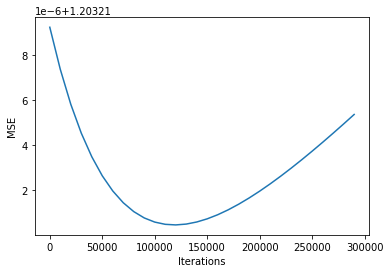

In [ ]:
num_iter = 300000
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[  7.183,   1.622,  11.131,   4.149,   5.742],
       [  3.547,   2.218, -12.15 ,   7.577,   5.839],
       [  8.09 ,   2.278,   6.921,   6.431,   7.422],
       [  9.588,   2.796,   7.   ,   7.999,   9.002],
       [  6.476,   1.609,   8.202,   4.314,   5.488],
       [  2.837,   0.608,   4.808,   1.51 ,   2.198],
       [  5.273,   1.319,   6.576,   3.545,   4.486],
       [  7.523,   2.474,   2.005,   7.369,   7.657],
       [  2.309,   1.826, -12.666,   6.422,   4.611],
       [  3.965,   0.991,   4.957,   2.662,   3.371]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [ ]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,"(8.0, 7.183076664597747)","(2.0, 1.6219365869358202)","(nan, 11.130681493738122)","(5.0, 4.14856375189189)","(4.0, 5.741698852185377)"
1,"(3.0, 3.5468975625914214)","(2.0, 2.218074415696861)","(nan, -12.150401486816582)","(7.0, 7.576594558155212)","(7.0, 5.839179046451438)"
2,"(9.0, 8.08967986018404)","(nan, 2.27752091995787)","(7.0, 6.921322461358099)","(8.0, 6.430916906351588)","(5.0, 7.422098195957213)"
3,"(nan, 9.58843847413024)","(nan, 2.7961266830602134)","(7.0, 7.00010116760734)","(8.0, 7.9993836835304695)","(9.0, 9.002053180372975)"
4,"(nan, 6.475639468090005)","(1.0, 1.6093211525892506)","(8.0, 8.202497955935234)","(3.0, 4.313878940208516)","(7.0, 5.488076552335936)"
5,"(2.0, 2.837434425545241)","(3.0, 0.6076400921354971)","(5.0, 4.808358947391367)","(nan, 1.5098246786239262)","(nan, 2.1980063804944128)"
6,"(4.0, 5.2728544057193885)","(2.0, 1.3186474483355681)","(nan, 6.576343774233964)","(2.0, 3.544767486591507)","(7.0, 4.486191035473351)"
7,"(7.0, 7.522949971141337)","(1.0, 2.4738786067453904)","(2.0, 2.0046912651647575)","(7.0, 7.368716551569428)","(9.0, 7.656562806309887)"
8,"(3.0, 2.3092047423736166)","(3.0, 1.8259817468061628)","(nan, -12.665942713575891)","(7.0, 6.422458119117669)","(3.0, 4.611120275772829)"
9,"(4.0, 3.9648028117242937)","(nan, 0.9905398467148943)","(5.0, 4.957222890799132)","(3.0, 2.6615568528422915)","(3.0, 3.3711968915166106)"


In [ ]:
df_users = pd.read_excel('https://github.com/albanda/CE888/blob/master/lab4-recommender/movies_latent_factors.xlsx?raw=true', sheet_name='Users')
df_users

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
5,783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
6,3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
7,768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
8,4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983
9,1882,-0.083093,-0.029160,0.013748,0.022716,-0.062732,-0.080670,-0.019723,0.013253,-0.091305,-0.090687,0.030638,-0.113364,-0.021325,0.181508,0.022357


In [ ]:
df_movies = pd.read_excel('https://github.com/albanda/CE888/blob/master/lab4-recommender/movies_latent_factors.xlsx?raw=true', sheet_name='Items')
df_movies.head(92)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5503,The Fugitive (1993),0.206806,0.296018,-0.629832,-0.039671,-0.258177,0.195434,-0.720161,-0.185779,0.900727,0.707901,-0.012180,0.751860,-0.020147,-0.247167,-0.019788
88,7443,Chicken Run (2000),1.213697,1.005139,0.581466,1.323310,0.090531,-0.284350,-0.283745,-0.572048,-0.424457,0.600002,-0.717770,0.131776,-0.322849,0.137185,0.093854
89,8358,Cast Away (2000),0.125461,-0.184684,-1.325737,-0.338724,0.534414,-0.192926,-0.428310,0.086399,-0.332286,0.158398,0.012957,0.467824,0.160335,-0.758867,0.476635
90,8467,Dumb & Dumber (1994),2.720287,1.217620,-0.101601,-0.119204,1.279939,2.805066,3.524783,-1.283701,-0.133343,-1.343301,-1.009496,1.808762,-1.240696,0.279910,1.616338


In [ ]:
#Answers
df_factor2 = df_movies[['Title','Factor10']]
df_factor2.sort_values('Factor10')

,Title,Factor10
47,Titanic (1997),-2.986807
57,Harry Potter and the Sorcerer's Stone (a.k.a. ...,-2.448020
58,Harry Potter and the Chamber of Secrets (2002),-2.380327
43,Spider-Man 2 (2004),-1.833755
42,Spider-Man (2002),-1.737383
...,...,...
16,The Lord of the Rings: The Return of the King ...,1.331742
15,The Lord of the Rings: The Two Towers (2002),1.348406
14,The Lord of the Rings: The Fellowship of the R...,1.348524
94,The Rock (1996),1.372162


In [ ]:
df_movies[df_movies['Movie ID']==9741]['Factor13'] #Question _7

93   -0.040781
Name: Factor13, dtype: float64

In [ ]:
# Q7
# In the movies dataset, what's the loading (i.e., value) of Factor15 for user with ID=4997?
num_factors = df_users.shape[1]-1
user_pref = df_users[df_users['User'] == 4997].iloc[:, -num_factors:].values[0]
item_feat = df_movies.iloc[:, -num_factors:].values

df_movies[df_movies['Movie ID']==597].index.values[0]

df_movies[df_movies['Movie ID']==597]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
47,597,Titanic (1997),1.567865,-1.516952,-2.523378,1.204485,1.729541,-0.088941,0.102822,1.747792,1.816958,-2.986807,-0.589441,-2.568582,0.370387,2.215933,0.456127


In [ ]:
user_pref = df_users[df_users['User'] == 4997].iloc[:, -num_factors:].values[0]
user_pref

array([-0.18544338, -0.27649645, -0.78127547, -0.24050617,  0.02961055,
       -0.27181376, -0.0562656 , -0.1118247 , -0.29090984, -0.25508709,
       -0.09807896,  0.10311568, -0.10056309,  0.1001642 ,  0.04319591])

In [ ]:
#Question 5

df_factor = df_movies[['Movie ID','Factor5']]

value = df_factor[df_factor['Movie ID']==10020]['Factor5'].values[0]
print(value)

round(value,3)

-0.04268691724914929


-0.043

In [ ]:
#Question 7 and 8

num_factors = df_users.shape[1]-1
user_pref = df_users[df_users['User'] == 4997].iloc[:, -num_factors:].values[0]
item_feat = df_movies.iloc[:, -num_factors:].values

In [ ]:
num_factors = df_users.shape[1]-1
num_factors

15

In [ ]:
# Q7
df_users[df_users['User']==4997]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
10,4997,-0.185443,-0.276496,-0.781275,-0.240506,0.029611,-0.271814,-0.056266,-0.111825,-0.29091,-0.255087,-0.098079,0.103116,-0.100563,0.100164,0.043196


In [ ]:
# Q8
df_movies[['Movie ID','Factor7', 'Title']].sort_values('Factor7')

,Movie ID,Factor7,Title
79,1894,-2.001102,Star Wars: Episode II - Attack of the Clones (...
78,1892,-1.925854,Star Wars: Episode VI - Return of the Jedi (1983)
0,11,-1.848910,Star Wars: Episode IV - A New Hope (1977)
77,1891,-1.847214,Star Wars: Episode V - The Empire Strikes Back...
44,568,-1.238276,Apollo 13 (1995)
...,...,...,...
36,393,1.497789,Kill Bill: Vol. 2 (2004)
5,24,1.613575,Kill Bill: Vol. 1 (2003)
68,854,2.444922,The Mask (1994)
85,3049,3.457525,Ace Ventura: Pet Detective (1994)


In [ ]:
a = df_users[df_users['User']==783].iloc[:, 1:].values
a

array([[-0.02030072, -0.03191882, -0.03695506,  0.03368984,  0.00017447,
        -0.00317767,  0.05447368,  0.04542381, -0.05330845,  0.00343744,
        -0.04174999,  0.05972515, -0.02164664,  0.03987334, -0.06185653]])

In [ ]:
#df_movies['Movie ID']==809]
b = df_movies[df_movies['Movie ID']==36955].iloc[:, 2:].values
b

array([[ 1.7340083 ,  0.26543644, -0.00339113, -0.4917539 , -0.32273944,
         0.85016544, -0.1503774 , -0.07589463,  1.37338584,  0.93476685,
         0.48929881, -0.06267823,  0.33370312, -0.22338212, -0.02259923]])

In [ ]:
#Calculates the dot product between the User,movie and the factor. Change User/Movie/factor to compare two
np.array(df_users[df_users['User'] == 3878].iloc[:, 1:].values).dot(np.array(df_movies[df_movies['Movie ID']==786].iloc[:, 2:].values).reshape(-1,1))

array([[-0.0921997]])

In [ ]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=3519, which ones would you choose?
r = np.array(df_users[df_users['User'] == 5323].iloc[:, 1:].values).dot(np.array(df_movies.iloc[:, 2:].values.T))

In [ ]:
np.argsort(r)

array([[90, 51, 20, 56, 79, 86, 37, 62, 93, 28, 18, 88, 17, 55, 57, 40,
        63, 82,  7, 44, 58, 75, 32,  6, 23, 80, 43, 25, 92, 99, 85,  3,
        48, 42, 98, 76, 24, 19, 45, 68, 94, 89,  8, 87, 60, 97, 64, 12,
        13, 72, 61, 81, 46, 66, 29, 53, 11, 95,  9, 84, 78, 52, 74, 54,
        83, 35,  1, 49, 71, 39, 77, 31, 65, 50,  0, 69, 15, 96, 14,  2,
        41, 22, 70, 38, 73, 16, 67, 34, 26, 36, 59, 30,  5, 47, 33,  4,
        10, 91, 27, 21]])

In [ ]:
a.shape

(0, 100)

In [ ]:
np.sort(a)

array([[-2.28087824, -1.8228327 , -1.4173849 , -1.24652913, -1.14041144,
        -1.10981678, -1.05273042, -0.80234714, -0.77189252, -0.61032209,
        -0.52241157, -0.51457819, -0.50685027, -0.50092655, -0.46530364,
        -0.46127286, -0.41679542, -0.40258353, -0.39512894, -0.38891749,
        -0.37032652, -0.36193229, -0.32020684, -0.26925395, -0.26649155,
        -0.26419851, -0.19496962, -0.19091796, -0.17827237, -0.17162809,
        -0.16893838, -0.16782275, -0.15414748, -0.11221219, -0.08836943,
        -0.07966321, -0.05310011, -0.03946078, -0.03410854, -0.03101317,
        -0.02344942, -0.00400157,  0.01974105,  0.02713954,  0.03080249,
         0.05047472,  0.05587586,  0.05822606,  0.06169667,  0.0695757 ,
         0.07746131,  0.08044214,  0.08409933,  0.09700956,  0.11687481,
         0.12979111,  0.14942257,  0.19073032,  0.1914492 ,  0.19547209,
         0.20788305,  0.21647038,  0.23782458,  0.24389948,  0.24888043,
         0.24898107,  0.26378479,  0.26882601,  0.2

In [ ]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=2067, which ones would you choose?
b = np.array(df_users[df_users['User'] == 783].iloc[:, 1:].values).dot(np.array(df_movies.iloc[:, 2:].values.T))

In [ ]:
np.argsort(b)

array([[ 7, 82, 18, 56, 61, 99,  6, 55, 97, 23, 35, 20, 93, 28, 49, 62,
        42, 11, 98, 43, 44, 34, 76,  8, 24, 48,  3, 52, 17, 32, 60, 74,
        92, 64, 94, 80, 25, 12, 29, 87, 40, 51, 30, 57, 63, 45,  9, 50,
        86, 19, 13, 88, 58, 41, 89, 53, 15, 37, 14, 16, 77, 78, 68, 31,
        79, 21, 47, 81,  0, 95,  5, 54, 75, 46, 71, 72, 36, 85, 26, 59,
        90, 73, 67, 96, 39, 38,  4, 22,  1,  2, 69, 10, 33, 70, 91, 83,
        84, 65, 66, 27]])

In [ ]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=3519, which ones would you choose?
df_users[df_users['User']==3519]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
15,3519,-0.068454,0.02009,0.039336,0.002958,-0.01814,0.006501,-0.108526,0.025045,0.056334,-0.031291,-0.035533,0.005171,0.005546,0.02078,-0.023623


In [ ]:
#df_jester.sort_values(by=df_jester[0], ascending=True)
#df_jester[0].sort_values(ascending=True)
df_movies.head(15)


,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
6,38,Eternal Sunshine of the Spotless Mind (2004),-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
7,63,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
8,77,Memento (2000),-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265
9,85,Raiders of the Lost Ark (Indiana Jones and the...,-1.241724,0.021130,0.489161,0.424584,-1.262253,1.190654,-0.606434,0.305721,1.438862,0.402682,0.438831,0.784948,-0.874375,-0.399984,-0.197686
